<a href="https://colab.research.google.com/github/SantoshRajVennapu/SantoshRaju-DataAnalyst/blob/main/Data_exploration_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
features = pd.read_excel('K-means Clustering_Copy.xlsx')
features = features[['Flat_and_Under120days','UW_Cancel','Freq_Ratio_of_Policies','Avg_$_Increase_in_CovA',
       'Max_Term','Avg_profitability','Recent_production']]
players = features.fillna(features.mean())

In [39]:
data = players.copy()

In [40]:
pd.options.display.float_format = '{:.4f}'.format
players.describe()


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000
mean,0.2300,0.1300,0.1645,122067.8124,0.3173,1326.7207,0.4722
std,0.2093,0.1618,0.1606,95668.7518,0.2392,754.3360,0.2878
min,0.0000,0.0000,0.0000,0.0000,0.0000,-12037.0000,0.0000
25%,0.1111,0.0256,0.0691,61000.0000,0.1000,976.3257,0.2760
50%,0.1906,0.0960,0.1429,124000.0000,0.2500,1326.7207,0.4722
75%,0.2931,0.1667,0.2166,167583.3333,0.5176,1610.6379,0.6943
max,1.0000,1.0000,1.0000,817000.0000,0.9882,6851.0000,1.0000


### **Scaling Avg_profititability and Avg_CovA using Minmax Scaler**

In [41]:
columns_to_scale = ['Avg_$_Increase_in_CovA', 'Avg_profitability']
data[columns_to_scale] = (data[columns_to_scale] - data[columns_to_scale].min()) / (data[columns_to_scale].max() - data[columns_to_scale].min())

data.describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000
mean,0.2300,0.1300,0.1645,0.1494,0.3173,0.7075,0.4722
std,0.2093,0.1618,0.1606,0.1171,0.2392,0.0399,0.2878
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1111,0.0256,0.0691,0.0747,0.1000,0.6890,0.2760
50%,0.1906,0.0960,0.1429,0.1518,0.2500,0.7075,0.4722
75%,0.2931,0.1667,0.2166,0.2051,0.5176,0.7226,0.6943
max,1.0000,1.0000,1.0000,1.0000,0.9882,1.0000,1.0000


## **Replacing 0 values with 1e-9**

In [42]:
##data = data.replace(0, 1e-9)


In [43]:
data

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
0,0.1956,0.0664,0.1286,0.1257,0.6881,0.7004,1.0000
1,0.0909,0.0000,0.0909,0.0575,0.2757,0.7668,0.4722
2,0.2234,0.0718,0.2341,0.1699,0.6556,0.6977,0.9980
3,0.1786,0.1137,0.1881,0.1652,0.6662,0.6803,0.8380
4,1.0000,0.0000,0.0000,0.0000,0.0500,0.7075,0.4722
...,...,...,...,...,...,...,...
1145,0.2300,0.1300,0.1645,0.1494,0.3000,0.6829,0.4722
1146,0.0000,0.0000,0.0000,0.0000,0.0000,0.7358,0.1760
1147,0.0000,0.0000,1.0000,0.1493,0.0000,0.7250,0.1760
1148,0.0000,0.0000,0.0000,0.0000,0.1000,0.7266,0.1760


# **Data Exploration**

<Axes: title={'center': 'Scatter Plot'}, xlabel='Avg_profitability', ylabel='Avg_$_Increase_in_CovA'>

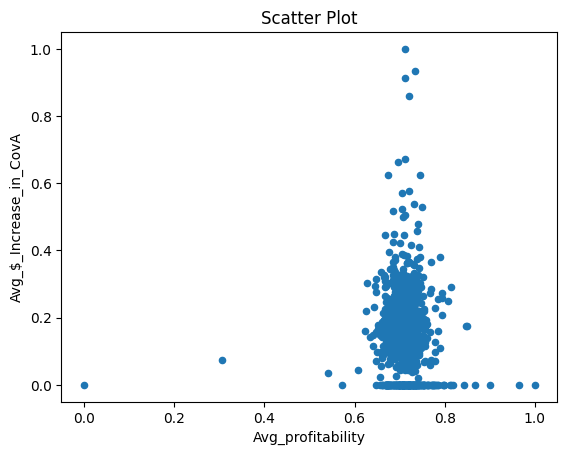

In [44]:
scatter = data.plot(kind = 'scatter', x= 'Avg_profitability',
                  y= 'Avg_$_Increase_in_CovA',
                  title = 'Scatter Plot')
scatter

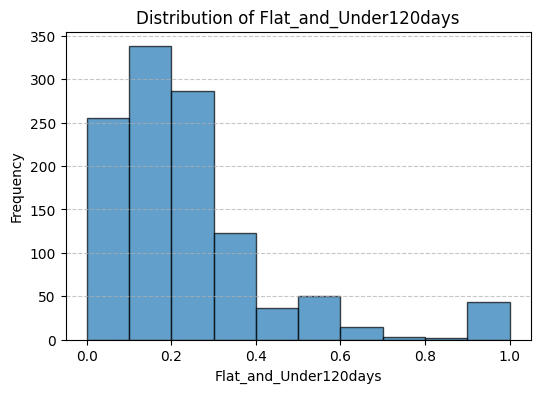

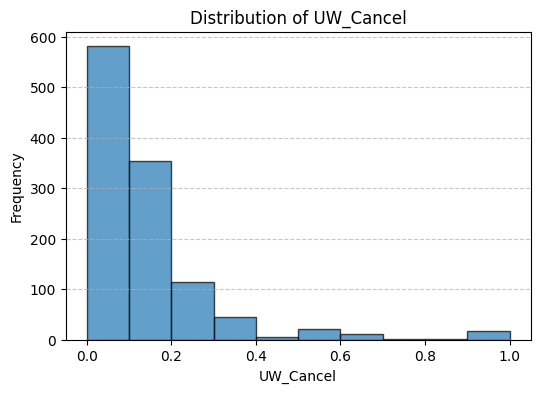

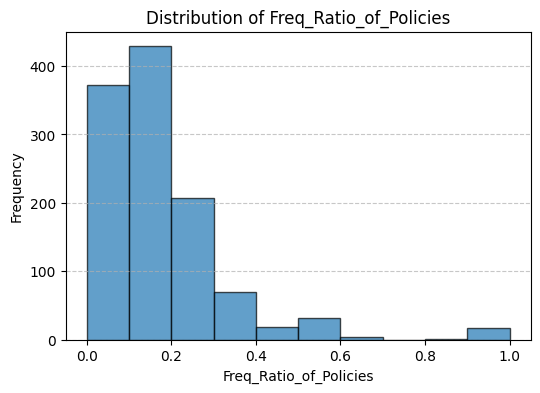

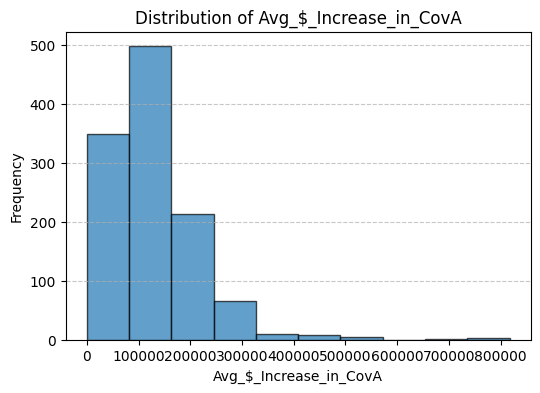

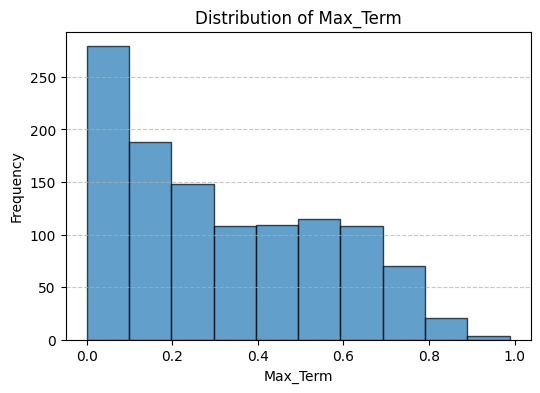

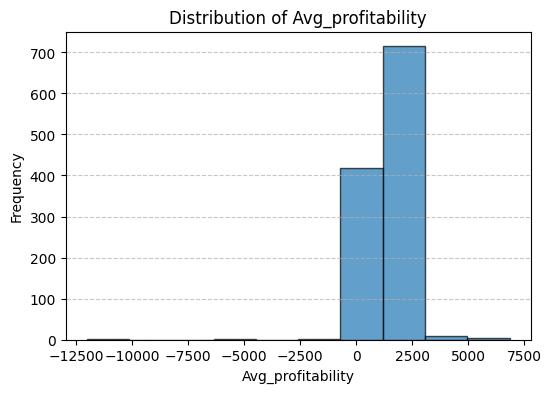

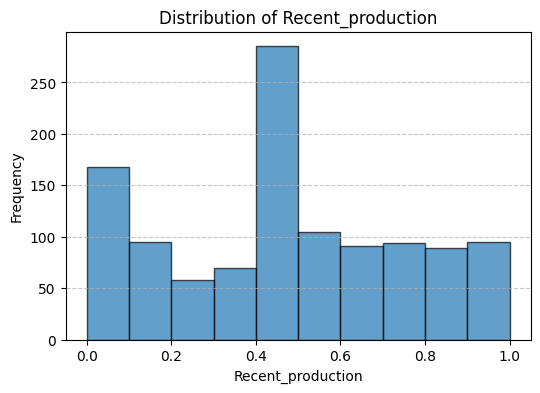

In [45]:

columns = [
    "Flat_and_Under120days", "UW_Cancel", "Freq_Ratio_of_Policies",
    "Avg_$_Increase_in_CovA", "Max_Term", "Avg_profitability", "Recent_production"
]

for column in columns:
    plt.figure(figsize=(6, 4))
    plt.hist(players[column], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


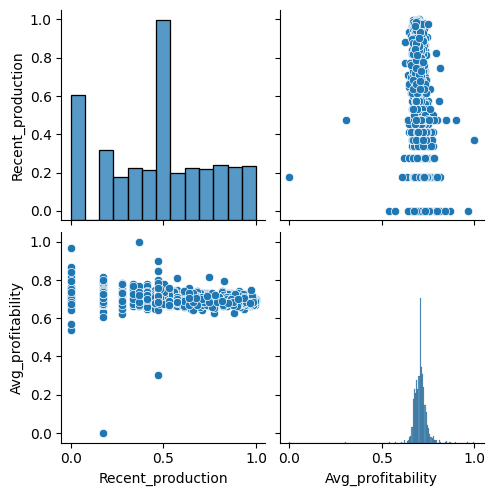

In [46]:
sns.pairplot(data,vars = ['Recent_production','Avg_profitability',])
plt.show()

In [47]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


## **Assigning Random Centroids**

In [48]:
centroids = random_centroids(data, 4)
centroids

<ipython-input-47-27b858476341>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x:float(x.sample()))


,0,1,2,3
Flat_and_Under120days,0.0000,0.0000,0.0000,0.3025
UW_Cancel,0.1818,0.0000,0.1143,0.3889
Freq_Ratio_of_Policies,0.1631,0.0631,0.0705,0.1645
Avg_$_Increase_in_CovA,0.2844,0.2623,0.0000,0.0000
Max_Term,0.3833,0.7167,0.7897,0.1313
Avg_profitability,0.6748,0.7183,0.6876,0.7474
Recent_production,0.7150,0.9950,0.4560,0.0000


In [49]:
data

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
0,0.1956,0.0664,0.1286,0.1257,0.6881,0.7004,1.0000
1,0.0909,0.0000,0.0909,0.0575,0.2757,0.7668,0.4722
2,0.2234,0.0718,0.2341,0.1699,0.6556,0.6977,0.9980
3,0.1786,0.1137,0.1881,0.1652,0.6662,0.6803,0.8380
4,1.0000,0.0000,0.0000,0.0000,0.0500,0.7075,0.4722
...,...,...,...,...,...,...,...
1145,0.2300,0.1300,0.1645,0.1494,0.3000,0.6829,0.4722
1146,0.0000,0.0000,0.0000,0.0000,0.0000,0.7358,0.1760
1147,0.0000,0.0000,1.0000,0.1493,0.0000,0.7250,0.1760
1148,0.0000,0.0000,0.0000,0.0000,0.1000,0.7266,0.1760


### **Calculating Eucleadian Distance**

In [50]:
def get_labels(data,centroids):
    distances  = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [51]:
labels = get_labels(data,centroids)

## **Baseline clusters Count**

In [52]:
labels.value_counts()

,count
0,544
3,349
2,182
1,75


### **Updating the centroids based on Geometric Mean**

In [53]:
data.groupby(labels).mean().T


,0,1,2,3
Flat_and_Under120days,0.1634,0.1603,0.1748,0.3776
UW_Cancel,0.0941,0.0822,0.0900,0.2170
Freq_Ratio_of_Policies,0.1749,0.1510,0.1414,0.1631
Avg_$_Increase_in_CovA,0.1835,0.1916,0.1373,0.0935
Max_Term,0.2359,0.6682,0.6424,0.1992
Avg_profitability,0.7021,0.7004,0.7168,0.7126
Recent_production,0.6332,0.8849,0.3716,0.1851


In [54]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).mean().T
    return centroids

## **Plotting in PCA**

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [56]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


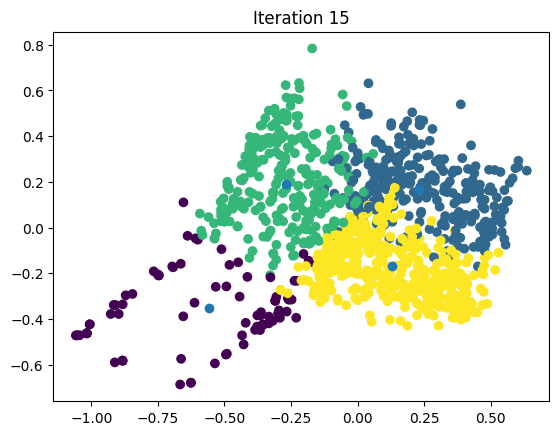

In [57]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [58]:
centroids

,0,1,2,3
Flat_and_Under120days,0.7872,0.1892,0.2128,0.1587
UW_Cancel,0.4932,0.1023,0.1016,0.0954
Freq_Ratio_of_Policies,0.1756,0.1612,0.1710,0.1602
Avg_$_Increase_in_CovA,0.0835,0.1839,0.1231,0.1563
Max_Term,0.0989,0.6039,0.3424,0.1511
Avg_profitability,0.7129,0.7094,0.7150,0.7003
Recent_production,0.2671,0.6403,0.1271,0.6243


## **Cluster 0**

In [59]:
players[labels ==0]

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
4,1.0000,0.0000,0.0000,0.0000,0.0500,1326.7207,0.4722
10,0.7500,0.7500,0.0000,0.0000,0.2000,1326.7207,0.4722
26,0.7500,0.2500,0.0000,0.0000,0.0500,1326.7207,0.4722
43,0.5000,0.2500,0.0000,0.0000,0.1000,1617.5000,0.1760
50,1.0000,0.0000,0.0000,0.0000,0.0500,1326.7207,0.4722
...,...,...,...,...,...,...,...
1096,1.0000,0.6667,0.3333,89000.0000,0.0000,1326.7207,0.3370
1105,1.0000,0.0000,0.0000,0.0000,0.0000,1326.7207,0.1760
1135,0.5000,0.5000,0.0000,0.0000,0.0750,-1243.0000,0.0000
1138,0.6667,0.6667,0.0000,0.0000,0.0000,3050.0000,0.1760


# **Cluster 1**

In [60]:
players[labels ==1]

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
0,0.1956,0.0664,0.1286,102729.1667,0.6881,1192.3037,1.0000
2,0.2234,0.0718,0.2341,138827.5862,0.6556,1141.1572,0.9980
3,0.1786,0.1137,0.1881,134985.6115,0.6662,812.0833,0.8380
5,0.2500,0.0833,0.0833,124000.0000,0.7054,1726.7143,0.7090
7,0.2265,0.1036,0.1197,163027.0270,0.5641,1815.5587,0.8420
...,...,...,...,...,...,...,...
923,0.0690,0.0517,0.1552,179666.6667,0.4500,1291.0000,0.7540
935,0.2500,0.1250,0.2500,209250.0000,0.4000,1253.6667,0.5720
945,0.2292,0.2292,0.1250,160333.3333,0.3875,817.5000,0.8220
956,0.1250,0.0625,0.1875,179333.3333,0.4500,1515.5000,0.4100


# **Cluster 2**

In [61]:
players[labels ==2]

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
6,0.3492,0.1270,0.3492,184318.1818,0.5243,1312.0000,0.0000
8,0.3716,0.1284,0.1486,106818.1818,0.4645,1346.1538,0.0000
19,0.2174,0.0870,0.3043,155571.4286,0.6417,1422.9333,0.2760
22,0.4839,0.1935,0.1935,266666.6667,0.4423,1948.4500,0.2760
24,0.2222,0.1778,0.2222,130300.0000,0.6544,1515.2581,0.2760
...,...,...,...,...,...,...,...
1142,0.0000,0.0000,0.0000,0.0000,0.0000,2072.0000,0.1760
1144,0.0000,0.0000,1.0000,509000.0000,0.0000,2031.0000,0.1760
1146,0.0000,0.0000,0.0000,0.0000,0.0000,1860.0000,0.1760
1147,0.0000,0.0000,1.0000,122000.0000,0.0000,1656.0000,0.1760


# **Cluster 3**

In [62]:
players[labels ==3]

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
1,0.0909,0.0000,0.0909,47000.0000,0.2757,2445.5000,0.4722
9,0.3333,0.1667,0.0000,0.0000,0.1833,1972.0000,0.4722
17,0.3214,0.2143,0.0357,60000.0000,0.3300,835.1765,0.6490
25,0.5000,0.0000,0.0000,0.0000,0.1500,1326.7207,0.4722
27,0.5000,0.0000,0.0000,0.0000,0.0500,1855.2500,0.4722
...,...,...,...,...,...,...,...
1132,0.2000,0.2000,0.2000,106000.0000,0.1000,907.4000,0.3700
1139,0.0000,0.0000,0.0000,0.0000,0.2500,1462.0000,0.4722
1140,0.0000,0.0000,0.0000,0.0000,0.3000,2271.8571,0.4722
1143,0.0000,0.0000,0.0000,0.0000,0.0000,971.0000,0.2760


# **SCIKIT IMPORTED MODEL**

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [65]:
data.describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000,1150.0000
mean,0.2300,0.1300,0.1645,0.1494,0.3173,0.7075,0.4722
std,0.2093,0.1618,0.1606,0.1171,0.2392,0.0399,0.2878
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1111,0.0256,0.0691,0.0747,0.1000,0.6890,0.2760
50%,0.1906,0.0960,0.1429,0.1518,0.2500,0.7075,0.4722
75%,0.2931,0.1667,0.2166,0.2051,0.5176,0.7226,0.6943
max,1.0000,1.0000,1.0000,1.0000,0.9882,1.0000,1.0000


In [66]:
pd.DataFrame(kmeans.cluster_centers_, columns=data.columns).T

,0,1,2,3
Flat_and_Under120days,0.2081,0.1605,0.7872,0.1902
UW_Cancel,0.0992,0.0963,0.4932,0.1031
Freq_Ratio_of_Policies,0.1694,0.1610,0.1756,0.1614
Avg_$_Increase_in_CovA,0.1213,0.1579,0.0835,0.1838
Max_Term,0.3360,0.1525,0.0989,0.6036
Avg_profitability,0.7148,0.7003,0.7129,0.7094
Recent_production,0.1296,0.6287,0.2671,0.6394


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


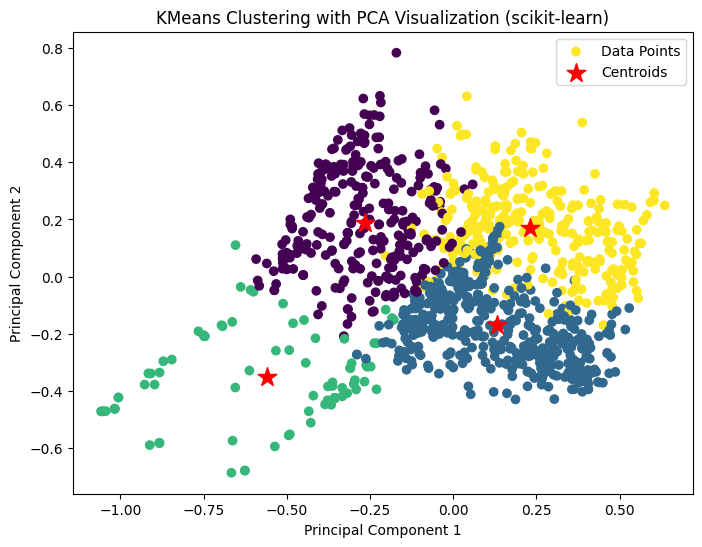

In [67]:
# prompt: write script to visualze data in PCA from kmeans model of scikit

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Get cluster labels
labels_sklearn = kmeans.labels_

# PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Plot the clusters with scikit-learn results
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_sklearn, cmap='viridis', label='Data Points')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering with PCA Visualization (scikit-learn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [68]:
# prompt: give me code to list all datapoints from kmeans with respect to each cluster in dataframe to identify datapoint and its cluster

import pandas as pd

# Assuming 'data' and 'labels_sklearn' are defined from your previous code
# Create a DataFrame with data points and their assigned clusters
clustered_data = pd.DataFrame(data)
clustered_data['Cluster'] = labels_sklearn

# Display the DataFrame
print(clustered_data)

      Flat_and_Under120days  UW_Cancel  Freq_Ratio_of_Policies  \
0                    0.1956     0.0664                  0.1286   
1                    0.0909     0.0000                  0.0909   
2                    0.2234     0.0718                  0.2341   
3                    0.1786     0.1137                  0.1881   
4                    1.0000     0.0000                  0.0000   
...                     ...        ...                     ...   
1145                 0.2300     0.1300                  0.1645   
1146                 0.0000     0.0000                  0.0000   
1147                 0.0000     0.0000                  1.0000   
1148                 0.0000     0.0000                  0.0000   
1149                 0.5000     0.2500                  0.0000   

      Avg_$_Increase_in_CovA  Max_Term  Avg_profitability  Recent_production  \
0                     0.1257    0.6881             0.7004             1.0000   
1                     0.0575    0.2757         

In [69]:
print(f"Data points in cluster 0:")
clustered_data[clustered_data['Cluster'] == 0].describe()

Data points in cluster 0:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
count,302.0000,302.0000,302.0000,302.0000,302.0000,302.0000,302.0000,302.0000
mean,0.2081,0.0992,0.1694,0.1213,0.3360,0.7148,0.1296,0.0000
std,0.1510,0.0973,0.1745,0.1237,0.2098,0.0541,0.1298,0.0000
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0785,0.0000,0.0000,0.0000,0.1500,0.7010,0.0000,0.0000
50%,0.2222,0.0984,0.1471,0.1148,0.3421,0.7132,0.1760,0.0000
75%,0.3248,0.1667,0.2500,0.1761,0.5088,0.7337,0.2760,0.0000
max,0.5455,0.3750,1.0000,0.9351,0.9442,0.9646,0.4100,0.0000


In [70]:
print(f"Data points in cluster 1:")
clustered_data[clustered_data['Cluster'] == 1]

Data points in cluster 1:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
1,0.0909,0.0000,0.0909,0.0575,0.2757,0.7668,0.4722,1
9,0.3333,0.1667,0.0000,0.0000,0.1833,0.7417,0.4722,1
17,0.3214,0.2143,0.0357,0.0734,0.3300,0.6815,0.6490,1
25,0.5000,0.0000,0.0000,0.0000,0.1500,0.7075,0.4722,1
27,0.5000,0.0000,0.0000,0.0000,0.0500,0.7355,0.4722,1
...,...,...,...,...,...,...,...,...
1128,0.0000,0.0000,0.0000,0.0000,0.2500,0.7182,0.4722,1
1132,0.2000,0.2000,0.2000,0.1297,0.1000,0.6853,0.3700,1
1139,0.0000,0.0000,0.0000,0.0000,0.2500,0.7147,0.4722,1
1140,0.0000,0.0000,0.0000,0.0000,0.3000,0.7576,0.4722,1


In [71]:
print(f"Data points in cluster 2:")
clustered_data[clustered_data['Cluster'] == 2]

Data points in cluster 2:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
4,1.0000,0.0000,0.0000,0.0000,0.0500,0.7075,0.4722,2
10,0.7500,0.7500,0.0000,0.0000,0.2000,0.7075,0.4722,2
26,0.7500,0.2500,0.0000,0.0000,0.0500,0.7075,0.4722,2
43,0.5000,0.2500,0.0000,0.0000,0.1000,0.7229,0.1760,2
50,1.0000,0.0000,0.0000,0.0000,0.0500,0.7075,0.4722,2
...,...,...,...,...,...,...,...,...
1096,1.0000,0.6667,0.3333,0.1089,0.0000,0.7075,0.3370,2
1105,1.0000,0.0000,0.0000,0.0000,0.0000,0.7075,0.1760,2
1135,0.5000,0.5000,0.0000,0.0000,0.0750,0.5715,0.0000,2
1138,0.6667,0.6667,0.0000,0.0000,0.0000,0.7988,0.1760,2


In [72]:
print(f"Data points in cluster 3:")
clustered_data[clustered_data['Cluster'] == 3]

Data points in cluster 3:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
0,0.1956,0.0664,0.1286,0.1257,0.6881,0.7004,1.0000,3
2,0.2234,0.0718,0.2341,0.1699,0.6556,0.6977,0.9980,3
3,0.1786,0.1137,0.1881,0.1652,0.6662,0.6803,0.8380,3
5,0.2500,0.0833,0.0833,0.1518,0.7054,0.7287,0.7090,3
7,0.2265,0.1036,0.1197,0.1995,0.5641,0.7334,0.8420,3
...,...,...,...,...,...,...,...,...
923,0.0690,0.0517,0.1552,0.2199,0.4500,0.7056,0.7540,3
935,0.2500,0.1250,0.2500,0.2561,0.4000,0.7037,0.5720,3
945,0.2292,0.2292,0.1250,0.1962,0.3875,0.6806,0.8220,3
956,0.1250,0.0625,0.1875,0.2195,0.4500,0.7175,0.4100,3
